# EDA-Tata-Set-Test-3

# SGEMM GPU Kernel Performance Data Set

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv(r"C:\Users\Administrator\Downloads\sgemm_product.csv")

In [5]:
df

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,128,128,32,32,32,32,32,8,4,4,1,0,1,1,17.96,17.77,17.77,17.77
241596,128,128,32,32,32,32,32,8,4,4,1,1,0,0,36.04,36.03,36.04,36.03
241597,128,128,32,32,32,32,32,8,4,4,1,1,0,1,35.28,34.82,35.27,35.27
241598,128,128,32,32,32,32,32,8,4,4,1,1,1,0,28.43,28.49,28.44,28.45


In [6]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [8]:
df.describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
count,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000
mean,80.415364,80.415364,25.513113,13.935894,13.935894,17.371126,17.371126,5.000000,2.448609,2.448609,0.500000,0.500000,0.500000,0.500000,217.647852,217.579536,217.532756,217.527669
std,42.469220,42.469220,7.855619,7.873662,7.873662,9.389418,9.389418,3.000006,1.953759,1.953759,0.500001,0.500001,0.500001,0.500001,369.012422,368.677309,368.655118,368.677413
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.290000,13.250000,13.360000,13.370000
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.660000,40.710000,40.660000,40.640000
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,5.000000,2.000000,2.000000,0.500000,0.500000,0.500000,0.500000,69.825000,69.930000,69.790000,69.820000
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,228.530000,228.310000,228.320000,228.320000
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,3339.630000,3375.420000,3397.080000,3361.710000


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MWG,241600.0,80.415364,42.469220,16.00,32.00,64.000,128.00,128.00
NWG,241600.0,80.415364,42.469220,16.00,32.00,64.000,128.00,128.00
KWG,241600.0,25.513113,7.855619,16.00,16.00,32.000,32.00,32.00
MDIMC,241600.0,13.935894,7.873662,8.00,8.00,8.000,16.00,32.00
NDIMC,241600.0,13.935894,7.873662,8.00,8.00,8.000,16.00,32.00
MDIMA,241600.0,17.371126,9.389418,8.00,8.00,16.000,32.00,32.00
NDIMB,241600.0,17.371126,9.389418,8.00,8.00,16.000,32.00,32.00
KWI,241600.0,5.000000,3.000006,2.00,2.00,5.000,8.00,8.00
VWM,241600.0,2.448609,1.953759,1.00,1.00,2.000,4.00,8.00
VWN,241600.0,2.448609,1.953759,1.00,1.00,2.000,4.00,8.00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   MWG        241600 non-null  int64  
 1   NWG        241600 non-null  int64  
 2   KWG        241600 non-null  int64  
 3   MDIMC      241600 non-null  int64  
 4   NDIMC      241600 non-null  int64  
 5   MDIMA      241600 non-null  int64  
 6   NDIMB      241600 non-null  int64  
 7   KWI        241600 non-null  int64  
 8   VWM        241600 non-null  int64  
 9   VWN        241600 non-null  int64  
 10  STRM       241600 non-null  int64  
 11  STRN       241600 non-null  int64  
 12  SA         241600 non-null  int64  
 13  SB         241600 non-null  int64  
 14  Run1 (ms)  241600 non-null  float64
 15  Run2 (ms)  241600 non-null  float64
 16  Run3 (ms)  241600 non-null  float64
 17  Run4 (ms)  241600 non-null  float64
dtypes: float64(4), int64(14)
memory usage: 33.2 MB


In [11]:
df.isnull().sum()

MWG          0
NWG          0
KWG          0
MDIMC        0
NDIMC        0
MDIMA        0
NDIMB        0
KWI          0
VWM          0
VWN          0
STRM         0
STRN         0
SA           0
SB           0
Run1 (ms)    0
Run2 (ms)    0
Run3 (ms)    0
Run4 (ms)    0
dtype: int64

In [12]:
dup=df.duplicated().sum()

In [13]:
dup

0

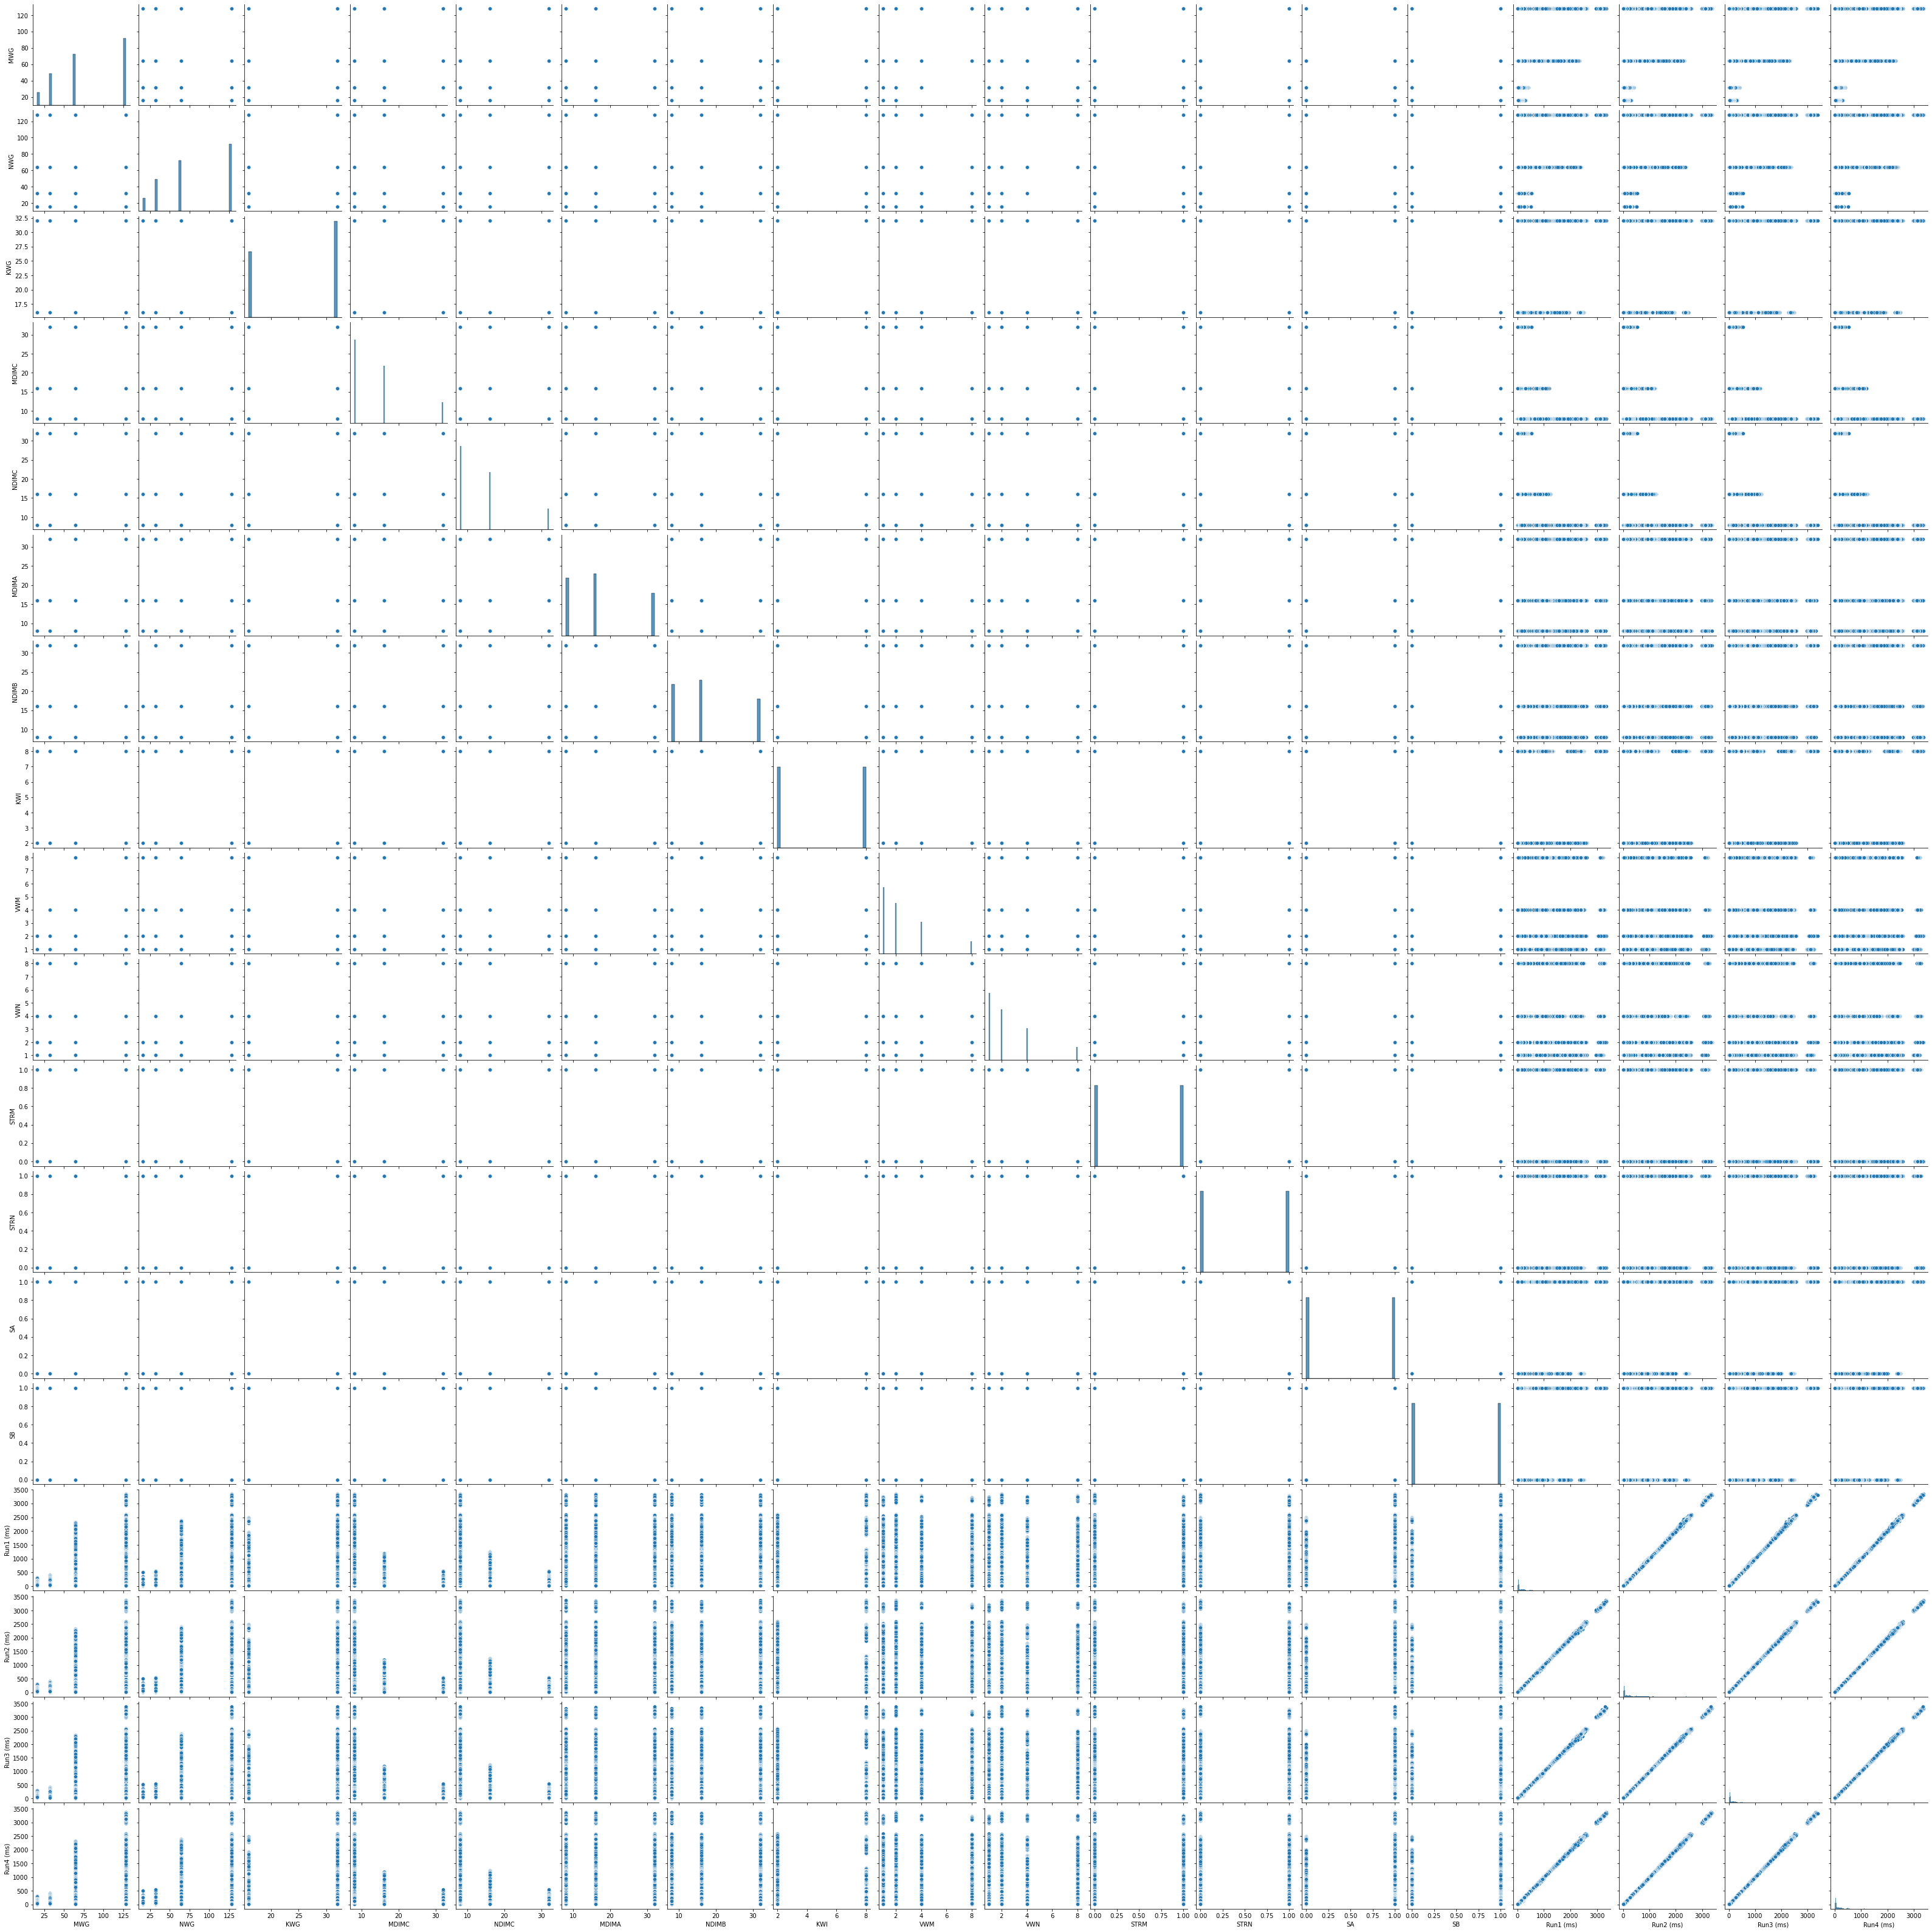

In [15]:
sns.pairplot(df)

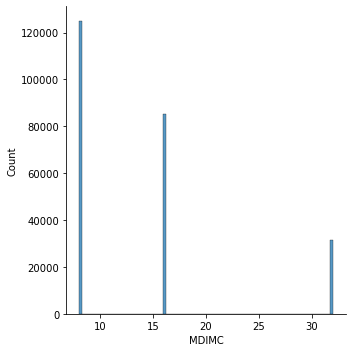

In [16]:
sns.displot(df["MDIMC"])

In [19]:
correlation_matrix = df.corr()

<AxesSubplot:>

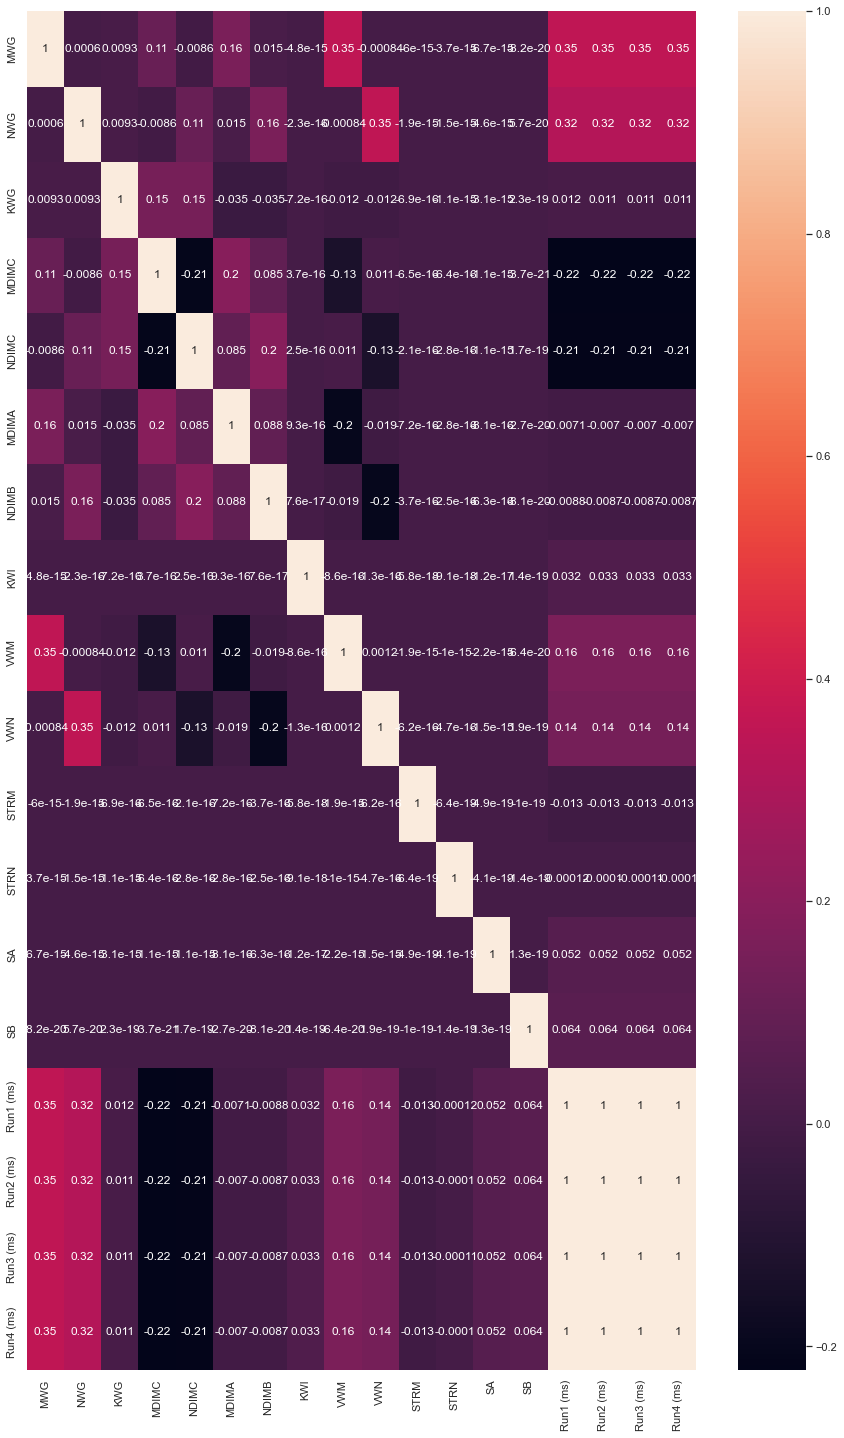

In [20]:
sns.set(rc={'figure.figsize':(15,25)})
sns.heatmap(correlation_matrix,annot=True)

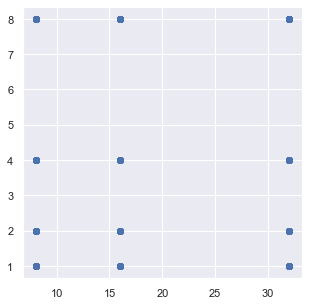

In [21]:
sns.set(rc={'figure.figsize':(5,5)})
plt.scatter(x=df["NDIMC"],y=df['VWM'])

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X=df

In [24]:
X.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   MWG        241600 non-null  int64  
 1   NWG        241600 non-null  int64  
 2   KWG        241600 non-null  int64  
 3   MDIMC      241600 non-null  int64  
 4   NDIMC      241600 non-null  int64  
 5   MDIMA      241600 non-null  int64  
 6   NDIMB      241600 non-null  int64  
 7   KWI        241600 non-null  int64  
 8   VWM        241600 non-null  int64  
 9   VWN        241600 non-null  int64  
 10  STRM       241600 non-null  int64  
 11  STRN       241600 non-null  int64  
 12  SA         241600 non-null  int64  
 13  SB         241600 non-null  int64  
 14  Run1 (ms)  241600 non-null  float64
 15  Run2 (ms)  241600 non-null  float64
 16  Run3 (ms)  241600 non-null  float64
 17  Run4 (ms)  241600 non-null  float64
dtypes: float64(4), int64(14)
memory usage: 33.2 MB


In [27]:
y=df['VWN']
y

0         1
1         1
2         1
3         1
4         1
         ..
241595    4
241596    4
241597    4
241598    4
241599    4
Name: VWN, Length: 241600, dtype: int64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169120 entries, 1982 to 121958
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   MWG        169120 non-null  int64  
 1   NWG        169120 non-null  int64  
 2   KWG        169120 non-null  int64  
 3   MDIMC      169120 non-null  int64  
 4   NDIMC      169120 non-null  int64  
 5   MDIMA      169120 non-null  int64  
 6   NDIMB      169120 non-null  int64  
 7   KWI        169120 non-null  int64  
 8   VWM        169120 non-null  int64  
 9   VWN        169120 non-null  int64  
 10  STRM       169120 non-null  int64  
 11  STRN       169120 non-null  int64  
 12  SA         169120 non-null  int64  
 13  SB         169120 non-null  int64  
 14  Run1 (ms)  169120 non-null  float64
 15  Run2 (ms)  169120 non-null  float64
 16  Run3 (ms)  169120 non-null  float64
 17  Run4 (ms)  169120 non-null  float64
dtypes: float64(4), int64(14)
memory usage: 24.5 MB


In [30]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72480 entries, 147294 to 239759
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MWG        72480 non-null  int64  
 1   NWG        72480 non-null  int64  
 2   KWG        72480 non-null  int64  
 3   MDIMC      72480 non-null  int64  
 4   NDIMC      72480 non-null  int64  
 5   MDIMA      72480 non-null  int64  
 6   NDIMB      72480 non-null  int64  
 7   KWI        72480 non-null  int64  
 8   VWM        72480 non-null  int64  
 9   VWN        72480 non-null  int64  
 10  STRM       72480 non-null  int64  
 11  STRN       72480 non-null  int64  
 12  SA         72480 non-null  int64  
 13  SB         72480 non-null  int64  
 14  Run1 (ms)  72480 non-null  float64
 15  Run2 (ms)  72480 non-null  float64
 16  Run3 (ms)  72480 non-null  float64
 17  Run4 (ms)  72480 non-null  float64
dtypes: float64(4), int64(14)
memory usage: 10.5 MB


In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(169120, 18)
(72480, 18)
(169120,)
(72480,)


In [32]:
from sklearn import linear_model
reg=linear_model.LinearRegression()

In [33]:
reg.fit(X_train,y_train)

LinearRegression()